## Summary

### Task 2 Q1)
* Approximately 78% of the sessions commence with an action ID linked to 2100, and upon closer investigation on the Trivago website, it seems to correspond to the "List Page Viewed Event. Assuming that most users start their journey on the website from the listing page

### Task 2 Q2)
*  **25%** of the sessions concluded with action ID **8001**, followed by **9.5%** of sessions with action ID **2100**.

### Task 3 Q3)
* The most common actions in sessions with conversions are action IDs 2142, 2160, 2113, 8001 (a Conversion Action), and 2100.
* The bar chart suggests that increasing events per session can boost conversions. This can be achieved by offering users more and improved filters and property listings. As a result, users tend to spend more time on the site, which increases the mean steps of the session and ultimately leads to better conversions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/ameen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_task2 = pd.read_excel('/Users/ameen/Downloads/202303_Task2_Actions.xlsx')

In [5]:
df_task2.head()

,"session_id,tracking_id,date_id,action_id,action_reference,step"
0,"2022051219047047198,W3ZTG14L5L,202205121905103..."
1,"2022053117093000001,001J2RM6SK,202205311709300..."
2,"2022051219047047198,W3ZTG14L5L,202205121905103..."
3,"2022053117093000001,001J2RM6SK,202205311709300..."
4,"2022051219047047198,W3ZTG14L5L,202205121905105..."


In [7]:
columns = df_task2.columns[0]

### Data Cleaning

In [8]:
split_data = df_task2[columns].str.split(',', expand=True)

In [9]:
split_data

,0,1,2,3,4,5
0,2022051219047047198,W3ZTG14L5L,2022051219051031064,2113,38715,27
1,2022053117093000001,001J2RM6SK,2022053117093000001,2100,0,1
2,2022051219047047198,W3ZTG14L5L,2022051219051031871,2160,62,28
3,2022053117093000001,001J2RM6SK,2022053117093002301,2100,0,3
4,2022051219047047198,W3ZTG14L5L,2022051219051051853,2113,38715,29
...,...,...,...,...,...,...
1048570,2022062508366011311,S1CUNC4JX8,2022062508367002108,2350,0,11
1048571,2022062508366011311,S1CUNC4JX8,2022062508367002113,2351,6,12
1048572,2022062508366011311,S1CUNC4JX8,2022062508367002112,2351,0,13
1048573,2022062508366011311,S1CUNC4JX8,2022062508367002680,2113,51357,15


In [10]:
columns

'session_id,tracking_id,date_id,action_id,action_reference,step'

In [11]:
split_data.columns = ['session_id', 'tracking_id', 'date_id', 'action_id', 'action_reference', 'step']

In [153]:
split_data

,session_id,tracking_id,date_id,action_id,action_reference,step
0,2022051219047047198,W3ZTG14L5L,2022051219051031064,2113,38715,27
1,2022053117093000001,001J2RM6SK,2022053117093000001,2100,0,1
2,2022051219047047198,W3ZTG14L5L,2022051219051031871,2160,62,28
3,2022053117093000001,001J2RM6SK,2022053117093002301,2100,0,3
4,2022051219047047198,W3ZTG14L5L,2022051219051051853,2113,38715,29
...,...,...,...,...,...,...
1048570,2022062508366011311,S1CUNC4JX8,2022062508367002108,2350,0,11
1048571,2022062508366011311,S1CUNC4JX8,2022062508367002113,2351,6,12
1048572,2022062508366011311,S1CUNC4JX8,2022062508367002112,2351,0,13
1048573,2022062508366011311,S1CUNC4JX8,2022062508367002680,2113,51357,15


In [19]:
df_task2 = split_data.copy()

In [27]:
df_task2['step'] = df_task2['step'].astype(int)

## Task2 Q1)
Explore how sessions start at trivago and think about how this might correspond to
our website.

In [31]:
df_action_start = df_task2[df_task2['step']==1].groupby(['action_id'])['date_id'].nunique().reset_index()

In [33]:
df_action_start.rename({'date_id':'events'},axis=1,inplace=True)

In [36]:
df_action_start.sort_values('events',ascending = False,inplace= True)

In [38]:
df_action_start.reset_index(drop = True,inplace=True)

In [40]:
df_action_start.head(10)

,action_id,events
0,2100,25238
1,2113,2212
2,2116,2176
3,2111,804
4,2115,356
5,2142,280
6,2114,259
7,2227,188
8,2160,132
9,2365,92


In [45]:
### Calculating the share of session's first action through action id 2100
df_action_start[df_action_start['action_id']=='2100']['events'].sum()/df_action_start.events.sum()

0.7829863804175845

#### Approximately 78% of the sessions commence with an action ID linked to 2100, and upon closer investigation on the Trivago website, it seems to correspond to the "List Page Viewed Event. Assuming that most users start their journey on the website from the listing page

## Task2 Q2)
Look at the last actions of sessions and find the drop rate for different actions

In [58]:
## Get the last action of each session
df_last_action = df_task2.loc[df_task2.groupby('session_id')['step'].idxmax()]

In [65]:
df_last_action_agg = df_last_action.groupby('action_id')['date_id'].nunique().reset_index()

In [69]:
df_last_action_agg.rename({'date_id':'events'},axis=1,inplace=True)

In [72]:
df_last_action_agg

,action_id,events
0,0,5
1,2100,3388
2,2108,6
3,2111,857
4,2113,3595
...,...,...
88,8002,29
89,8006,2
90,8020,16
91,8091,1


In [74]:
df_last_action_agg.sort_values('events',ascending=False,inplace=True)

In [86]:
df_last_action_agg.head(10).events.sum()

25436

In [104]:
### Printing the top 10 last session actions b
df_last_action_agg.head(10)

,action_id,events
87,8001,9107
4,2113,3595
1,2100,3388
7,2116,2145
23,2142,2055
30,2160,1433
28,2155,1253
3,2111,857
54,2350,848
63,2375,755


In [105]:
top_10_actions_list = list(df_last_action_agg.head(10)['action_id'].unique())

In [108]:
top_10_actions_list

['8001',
 '2113',
 '2100',
 '2116',
 '2142',
 '2160',
 '2155',
 '2111',
 '2350',
 '2375']

In [117]:
## categorizing action ids not in the top 10 action ids list into a buckets
df_last_action_agg['action_id_tag'] = np.where(df_last_action_agg['action_id'].isin(top_10_actions_list),df_last_action_agg['action_id'],'Others')

In [118]:
df_last_action_agg1 = df_last_action_agg.groupby('action_id_tag')['events'].sum().reset_index()

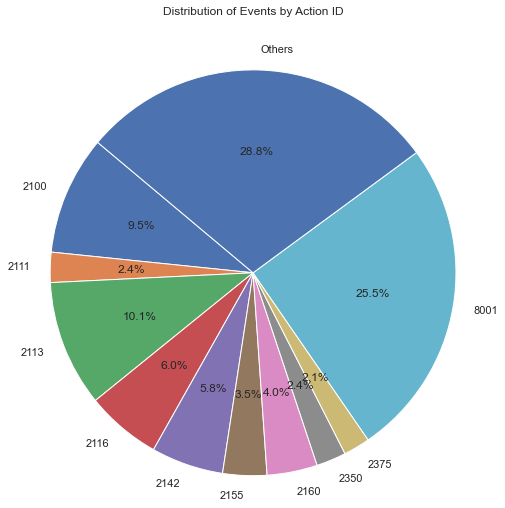

In [119]:
sns.set(style="whitegrid")

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(df_last_action_agg1['events'], labels=df_last_action_agg1['action_id_tag'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Events by Action ID', y=1.08)  # Adjust the 'y' value to move the title up

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

#### **25%** of the sessions concluded with action ID **8001**, followed by **9.5%** of sessions with action ID **2100**.

## Task2 Q3)
Now think about conversions on our site. What actions might we consider as
conversions? Can you determine from your analysis of the data which numbers refer
to these actions? Look into sessions with conversions that you have determined and
see if there are any actions that correspond to higher numbers of conversions.

In [140]:
## Action Id wise average steps and total events
df_action_id_agg = df_task2.groupby('action_id').agg({'step':'mean','date_id':'nunique'}).reset_index().sort_values('date_id',ascending = False)

In [141]:
df_action_id_agg.rename({'step':'mean_steps','date_id':'events'},inplace = True,axis=1)

In [143]:
df_action_id_agg.reset_index(drop=True,inplace=True)

In [149]:
df_top_10_actions = df_action_id_agg.head(10)

In [147]:
total_sessions = df_task2.session_id.nunique()
print('Total Sessions are {}'.format(total_sessions))

Total Sessions are 35722


#### Calculating the events/sessions ratio for top 10 most occuring action ids to determine the action id leading to conversion ie leading to a clickout

In [151]:
df_top_10_actions['events_per_session'] = df_top_10_actions['events']/total_sessions

/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_18883/2857646106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_actions['events_per_session'] = df_top_10_actions['events']/total_sessions


In [152]:
df_top_10_actions

,action_id,mean_steps,events,events_per_session
0,2142,90.815437,265151,7.422625
1,2160,28.256624,114588,3.207771
2,2113,34.687619,112065,3.137142
3,2100,9.308870,53741,1.504423
4,8001,55.013025,42533,1.190667
5,2116,35.456774,38923,1.089609
6,2455,54.544777,38368,1.074072
7,2350,34.473370,34472,0.965008
8,2358,35.230846,34196,0.957281
9,2351,42.265835,30297,0.848133


* Action IDs **2142, 2160, 2113** have very high event counts per session. This suggests that these actions are less likely to lead to conversions.

* Action ID **2100** has an event count of **1.5** per session, and users usually perform it early in their session, as we've seen before.
* Action ID **8001** occurs approximately **1.2** times during a session, and according to the pie chart, it marks the end of about **25%** of sessions. This indicates that it's often associated with conversions or clickouts. An events-per-session value of 1.2 is a strong indicator that it might be a likely value for **COR**, as we observed in Task 1.

In [208]:
#Sessions with Action Id 8001 are the sessions with Conversions

conv_session_ids = df_task2[df_task2['action_id']=='8001']['session_id'].unique()
## Creating a dataframe for sessions with conversions
df_conv_sessions = df_task2[df_task2.session_id.isin(conv_session_ids)]

In [209]:
df_conv_sessions_agg = df_conv_sessions.groupby(['action_id']).agg({'session_id':'nunique','date_id':'nunique','step':'mean'}).reset_index()

In [210]:
## Total sessions with Conversions
df_conv_sessions.session_id.nunique()

17614

In [211]:
df_conv_sessions_agg.rename({'session_id':'sessions','date_id':'events','step':'mean_steps'},axis=1,inplace=True)

In [212]:
df_conv_sessions_agg.sort_values('events',ascending = False,inplace=True)

In [213]:
## Top 20 actions of sessions with Conversions
df_conv_sessions_agg['events_per_session'] = df_conv_sessions_agg['events']/df_conv_sessions_agg['sessions']
df_conv_sessions_agg.head(20)

,action_id,sessions,events,mean_steps,events_per_session
24,2142,7305,192687,94.141712,26.377413
31,2160,16052,82172,29.558974,5.119113
4,2113,10680,78812,38.089415,7.379401
95,8001,17614,42533,55.013025,2.414727
1,2100,14466,31733,11.762613,2.193626
80,2455,4618,28227,58.371134,6.112386
7,2116,4753,26081,41.351252,5.487271
56,2350,14355,24293,37.942041,1.692302
61,2358,11712,23359,39.442142,1.994450
6,2115,3143,20861,45.522890,6.637289


In [214]:
## Creating a dataframe for sessions with no conversions
df_no_conv_sessions = df_task2[~df_task2.session_id.isin(conv_session_ids)]

In [215]:
df_no_conv_sessions.head()

,session_id,tracking_id,date_id,action_id,action_reference,step
0,2022051219047047198,W3ZTG14L5L,2022051219051031064,2113,38715,27
2,2022051219047047198,W3ZTG14L5L,2022051219051031871,2160,62,28
4,2022051219047047198,W3ZTG14L5L,2022051219051051853,2113,38715,29
6,2022051219047047198,W3ZTG14L5L,2022051219051052502,2160,63,30
8,2022051219047047198,W3ZTG14L5L,2022051219051078292,2113,38715,31


In [216]:
## Aggregating on action id
df_no_conv_sessions_agg = df_no_conv_sessions.groupby(['action_id']).agg({'session_id':'nunique','date_id':'nunique','step':'mean'}).reset_index()

In [217]:
df_no_conv_sessions_agg.rename({'session_id':'sessions','date_id':'events','step':'mean_steps'},axis=1,inplace=True)

In [218]:
df_no_conv_sessions_agg['events_per_session'] = df_no_conv_sessions_agg['events']/df_no_conv_sessions_agg['sessions']

In [219]:
df_no_conv_sessions_agg.sort_values('events',ascending = False,inplace=True)

In [220]:
df_no_conv_sessions_agg['session_type'] = 'no_conversion'
df_conv_sessions_agg['session_type'] = 'conversion'

In [221]:
df_session_metrics_comparison = pd.concat([df_conv_sessions_agg,df_no_conv_sessions_agg],ignore_index=True)

In [226]:
top_actions = list(df_conv_sessions_agg.head(10)['action_id'].unique())

In [227]:
top_actions = df_session_metrics_comparison[df_session_metrics_comparison['action_id'].isin(top_actions)]

In [228]:
top_actions.head()

,action_id,sessions,events,mean_steps,events_per_session,session_type
0,2142,7305,192687,94.141712,26.377413,conversion
1,2160,16052,82172,29.558974,5.119113,conversion
2,2113,10680,78812,38.089415,7.379401,conversion
3,8001,17614,42533,55.013025,2.414727,conversion
4,2100,14466,31733,11.762613,2.193626,conversion


/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_18883/1513564000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_actions['mean_steps'] = top_actions['mean_steps'].round(1)
/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_18883/1513564000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_actions['events_per_session'] = top_actions['events_per_session'].round(1)


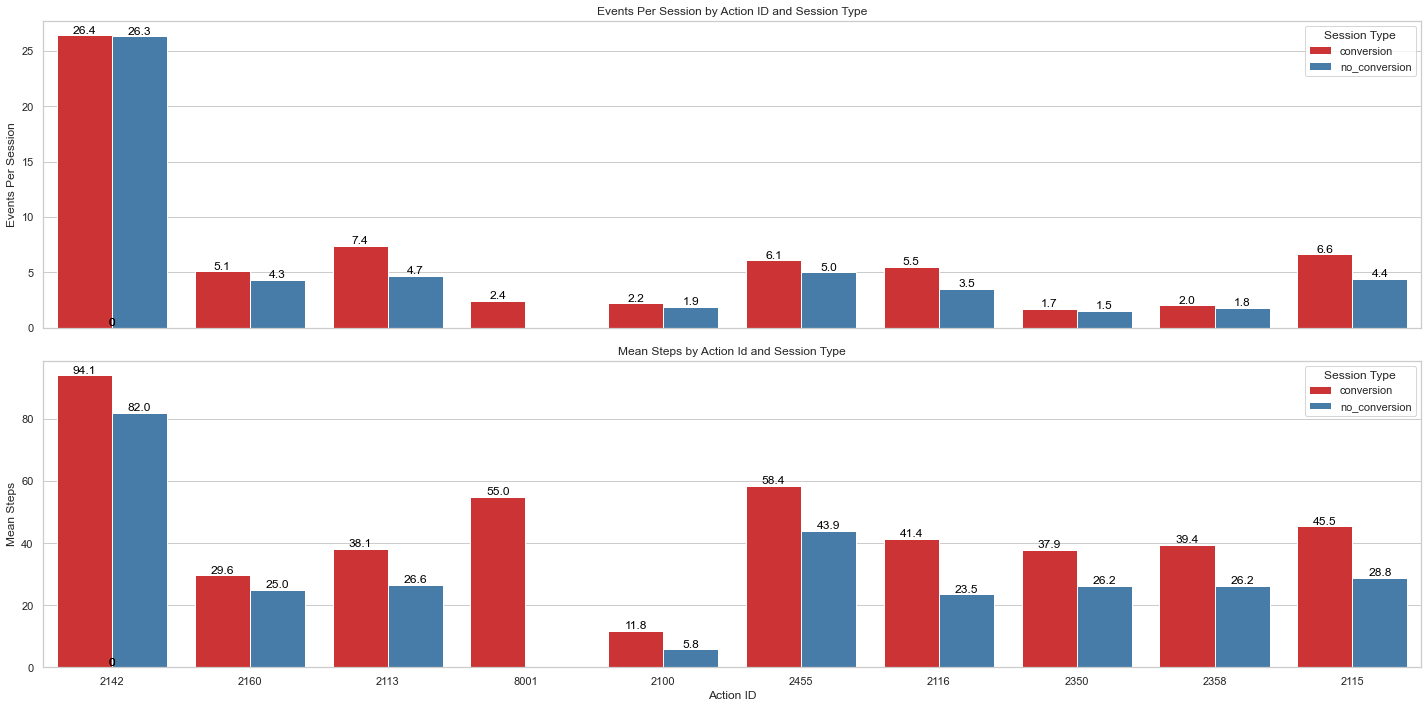

In [233]:
sns.set(style="whitegrid")
top_actions['mean_steps'] = top_actions['mean_steps'].round(1)
top_actions['events_per_session'] = top_actions['events_per_session'].round(1)

# Create a figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

# Plot 1 - Bar Chart for 'Events per session'
sns.barplot(x='action_id', y='events_per_session', hue='session_type', data=top_actions, palette='Set1', ax=axes[0])
axes[0].set_title('Events Per Session by Action ID and Session Type')
axes[0].set_xlabel('Action ID')
axes[0].set_ylabel('Events Per Session')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title='Session Type', loc='best')

# Annotate each bar with its corresponding y-value
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Plot 2 - Bar Chart for 'cor'
sns.barplot(x='action_id', y='mean_steps', hue='session_type',data=top_actions, palette='Set1', ax=axes[1])
axes[1].set_title('Mean Steps by Action Id and Session Type')
axes[1].set_ylabel('Mean Steps')
axes[1].set_xlabel('Action ID')
axes[1].legend(handles=handles, labels=labels, title='Session Type', loc='best')

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Plot 3 - Bar Chart for 'avg_session_duration'

plt.tight_layout()
plt.show()


* The most common actions in sessions with conversions are action IDs 2142, 2160, 2113, 8001 (a Conversion Action), and 2100.
* Action ID 2142 likely involves viewing content items, and having more of this action is beneficial for conversions.
* The bar chart suggests that increasing events per session can boost conversions. This can be achieved by offering users more and improved filters and property listings. As a result, users tend to spend more time on the site, which increases the mean steps of the session and ultimately leads to better conversions.